In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import pandas as pd
import numpy as np

# ==========================================
# 1. SETUP PATHS & LOAD DATA
# ==========================================
# Kaggle Input Directory
DATA_DIR = '/kaggle/input/sdd-dataset'

# A. Find the Metadata CSV (Handling different names)
if os.path.exists(os.path.join(DATA_DIR, 'HAM10000_metadata.csv')):
    CSV_PATH = os.path.join(DATA_DIR, 'HAM10000_metadata.csv')
else:
    CSV_PATH = os.path.join(DATA_DIR, 'HAM10000_metadata')

print(f"--- Loading Data from: {CSV_PATH} ---")
df = pd.read_csv(CSV_PATH)

# B. Find the Image Folders (Handling nested loops)
part1 = os.path.join(DATA_DIR, 'HAM10000_images_part_1')
if not os.path.exists(part1): 
    # Try nested path
    part1 = os.path.join(DATA_DIR, 'HAM10000_images_part_1', 'HAM10000_images_part_1')

part2 = os.path.join(DATA_DIR, 'HAM10000_images_part_2')
if not os.path.exists(part2): 
    # Try nested path
    part2 = os.path.join(DATA_DIR, 'HAM10000_images_part_2', 'HAM10000_images_part_2')

# C. Verify Image Paths
def get_path(image_id):
    p1 = os.path.join(part1, f"{image_id}.jpg")
    if os.path.exists(p1): return p1
    p2 = os.path.join(part2, f"{image_id}.jpg")
    if os.path.exists(p2): return p2
    return None

print("Mapping image paths (this takes a second)...")
df['path'] = df['image_id'].apply(get_path)

# Remove rows where image file is missing
initial_len = len(df)
df = df.dropna(subset=['path'])
print(f"✅ Images Found: {len(df)} / {initial_len}")

# ==========================================
# 2. INSPECT THE DATASET (The Info You Needed)
# ==========================================
print("\n--- 1. Disease Counts (Class Balance) ---")
print(df['dx'].value_counts())

print("\n--- 2. Metadata Example (First 5 Rows) ---")
print(df.head())

print("\n--- 3. Missing Values ---")
print(df.isnull().sum())

--- Loading Data from: /kaggle/input/sdd-dataset/HAM10000_metadata ---
Mapping image paths (this takes a second)...
✅ Images Found: 10015 / 10015

--- 1. Disease Counts (Class Balance) ---
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

--- 2. Metadata Example (First 5 Rows) ---
     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset                                               path  
0  vidir_modern  /kaggle/input/sdd-dataset/HAM10000_images_part...  
1  vidir_modern  /kaggle/input/sdd-dataset/HAM10000_images_part...  
2  vidir_mod

--- ⚙️ Setting up Pipeline on cuda ---


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 206MB/s]


✅ Model Configured: Smoothed Sampling + Fine-Tuning. Starting Training...


Epoch 1/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=1.0880, Val Loss=0.7738 | Train Acc=64.20%, Val Acc=78.48%
   🔥 New Best Model Saved! (Acc: 78.48%)


Epoch 2/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.8824, Val Loss=0.7764 | Train Acc=73.96%, Val Acc=78.23%


Epoch 3/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.8134, Val Loss=0.7371 | Train Acc=76.50%, Val Acc=80.68%
   🔥 New Best Model Saved! (Acc: 80.68%)


Epoch 4/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.7644, Val Loss=0.7118 | Train Acc=79.03%, Val Acc=81.43%
   🔥 New Best Model Saved! (Acc: 81.43%)


Epoch 5/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.7063, Val Loss=0.7048 | Train Acc=81.70%, Val Acc=81.73%
   🔥 New Best Model Saved! (Acc: 81.73%)


Epoch 6/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.6930, Val Loss=0.7184 | Train Acc=82.21%, Val Acc=81.63%


Epoch 7/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.6401, Val Loss=0.7001 | Train Acc=84.34%, Val Acc=82.58%
   🔥 New Best Model Saved! (Acc: 82.58%)


Epoch 8/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.6281, Val Loss=0.6918 | Train Acc=84.89%, Val Acc=82.48%


Epoch 9/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.6082, Val Loss=0.6844 | Train Acc=85.76%, Val Acc=82.83%
   🔥 New Best Model Saved! (Acc: 82.83%)


Epoch 10/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.5847, Val Loss=0.6671 | Train Acc=86.91%, Val Acc=83.72%
   🔥 New Best Model Saved! (Acc: 83.72%)


Epoch 11/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.5825, Val Loss=0.6700 | Train Acc=87.31%, Val Acc=84.57%
   🔥 New Best Model Saved! (Acc: 84.57%)


Epoch 12/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.5573, Val Loss=0.6582 | Train Acc=88.57%, Val Acc=83.67%


Epoch 13/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.5494, Val Loss=0.6684 | Train Acc=88.84%, Val Acc=83.97%


Epoch 14/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.5318, Val Loss=0.6521 | Train Acc=89.59%, Val Acc=85.02%
   🔥 New Best Model Saved! (Acc: 85.02%)


Epoch 15/15 [Train]:   0%|          | 0/251 [00:00<?, ?it/s]

   Stats: Train Loss=0.5160, Val Loss=0.6218 | Train Acc=90.50%, Val Acc=86.52%
   🔥 New Best Model Saved! (Acc: 86.52%)

🎉 Training Complete. Generating Graphs...


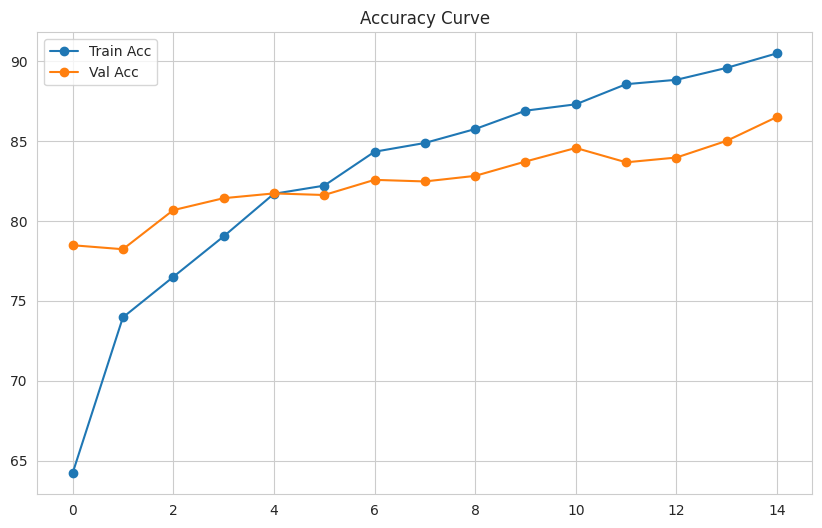

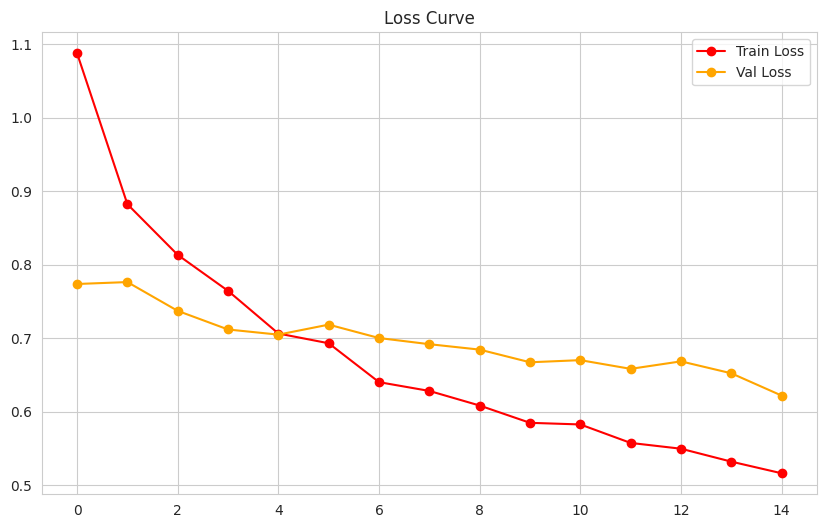

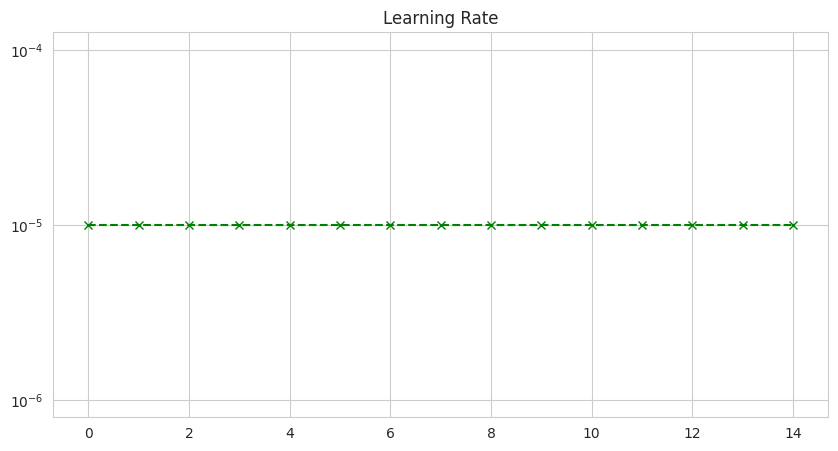

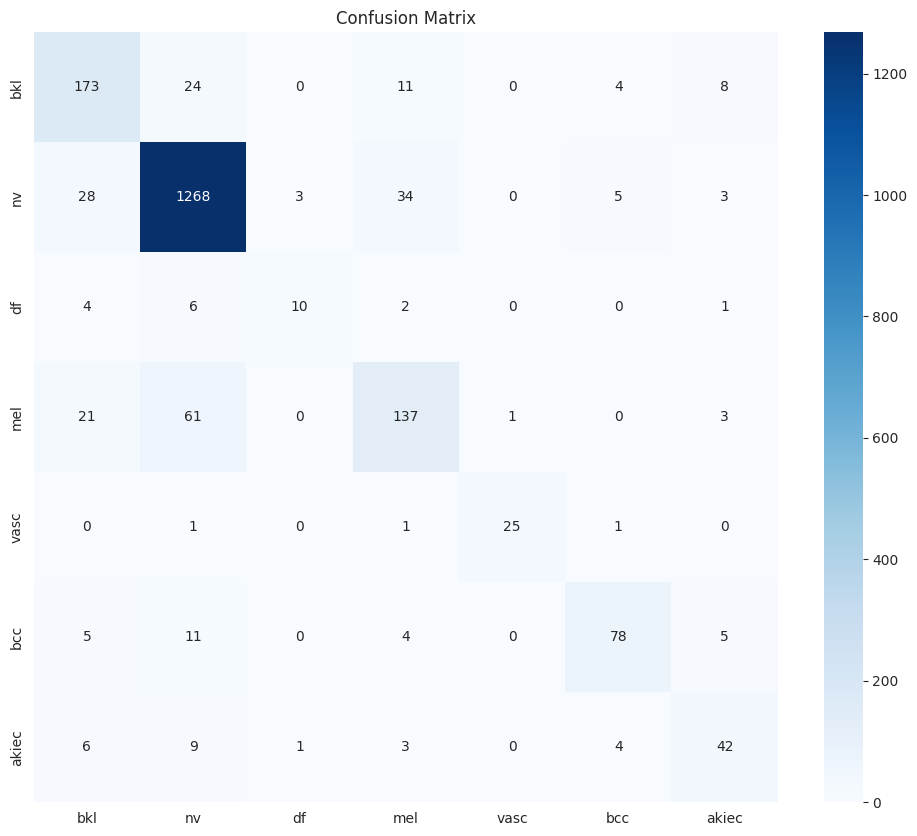

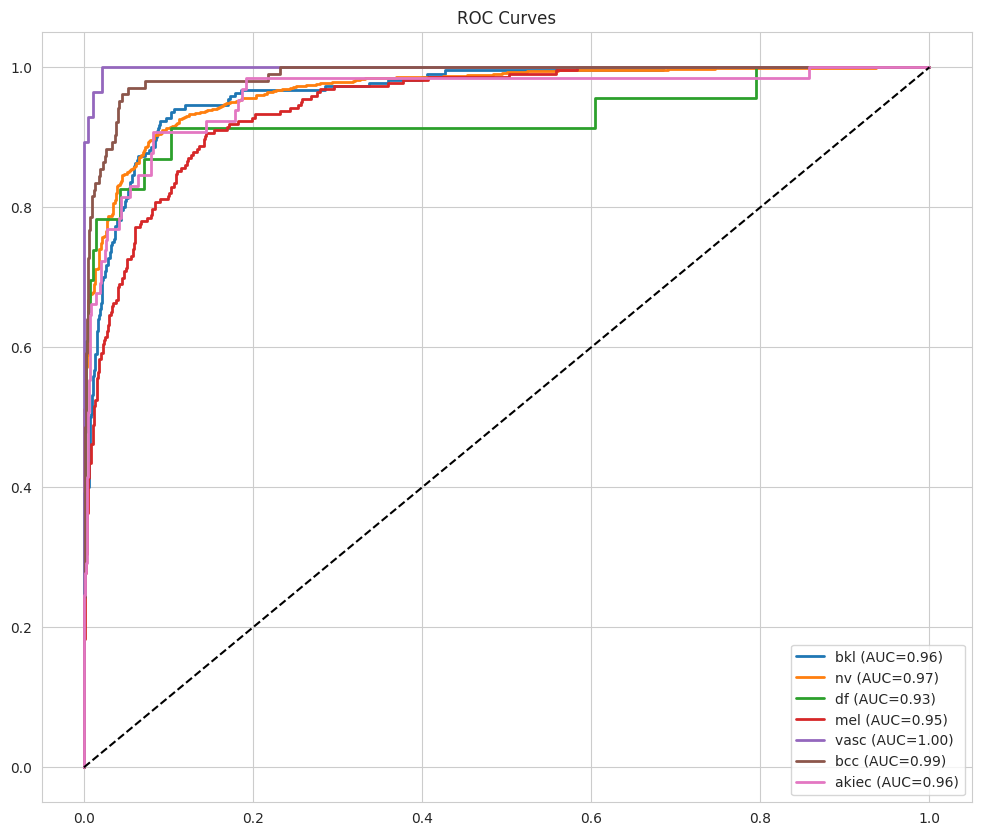

🎉 ALL FIGURES SAVED SUCCESSFULLY!


In [2]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import models, transforms
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# ==========================================
# 1. SETUP: LOAD DATA & ROBUST PATHS
# ==========================================
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"--- ⚙️ Setting up Pipeline on {DEVICE} ---")

DATA_DIR = '/kaggle/input/sdd-dataset'
if os.path.exists(os.path.join(DATA_DIR, 'HAM10000_metadata.csv')):
    CSV_PATH = os.path.join(DATA_DIR, 'HAM10000_metadata.csv')
else:
    CSV_PATH = os.path.join(DATA_DIR, 'HAM10000_metadata')

df = pd.read_csv(CSV_PATH)

# Path Finder
part1 = os.path.join(DATA_DIR, 'HAM10000_images_part_1')
if not os.path.exists(part1): part1 = os.path.join(DATA_DIR, 'HAM10000_images_part_1', 'HAM10000_images_part_1')
part2 = os.path.join(DATA_DIR, 'HAM10000_images_part_2')
if not os.path.exists(part2): part2 = os.path.join(DATA_DIR, 'HAM10000_images_part_2', 'HAM10000_images_part_2')

def get_path(image_id):
    p1 = os.path.join(part1, f"{image_id}.jpg")
    if os.path.exists(p1): return p1
    p2 = os.path.join(part2, f"{image_id}.jpg")
    if os.path.exists(p2): return p2
    return None

df['path'] = df['image_id'].apply(get_path)
df = df.dropna(subset=['path'])
label_map = {label: i for i, label in enumerate(df['dx'].unique())}
df['label_idx'] = df['dx'].map(label_map)

# Metadata
df['age'] = df['age'].fillna(df['age'].mean())
meta_encoded = pd.get_dummies(df[['age', 'sex', 'localization']], columns=['sex', 'localization'])
meta_encoded['age'] = (meta_encoded['age'] - meta_encoded['age'].mean()) / meta_encoded['age'].std()
meta_array = meta_encoded.values.astype(np.float32)

# Split
train_idx, val_idx = train_test_split(df.index, test_size=0.2, random_state=42, stratify=df['label_idx'])
train_df = df.loc[train_idx].reset_index(drop=True)
val_df = df.loc[val_idx].reset_index(drop=True)
train_meta = meta_array[train_idx]
val_meta = meta_array[val_idx]

# ==========================================
# FIX 1: SMOOTHED SAMPLING (Square Root)
# ==========================================
# Instead of 1/Count (Aggressive), we use 1/sqrt(Count) (Smoother)
class_counts = train_df['label_idx'].value_counts().sort_index()
weights = 1.0 / np.sqrt(class_counts) 
sample_weights = [weights[label] for label in train_df['label_idx']]
sampler = WeightedRandomSampler(sample_weights, len(train_df), replacement=True)

# ==========================================
# 2. SETUP DATASET & SAFE AUGMENTATION
# ==========================================
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),      
    transforms.RandomRotation(20),        
    # Safe Jitter (No neon skin)
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class MultiModalDataset(Dataset):
    def __init__(self, dataframe, meta_data, transform=None):
        self.df = dataframe
        self.meta = meta_data
        self.transform = transform
    def __len__(self): return len(self.df)
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = Image.open(row['path']).convert('RGB')
        if self.transform: img = self.transform(img)
        return img, torch.tensor(self.meta[idx], dtype=torch.float32), torch.tensor(row['label_idx'], dtype=torch.long)

train_loader = DataLoader(MultiModalDataset(train_df, train_meta, train_transform), batch_size=32, sampler=sampler, num_workers=2)
val_loader = DataLoader(MultiModalDataset(val_df, val_meta, val_transform), batch_size=32, shuffle=False, num_workers=2)

# ==========================================
# 3. MODEL: FINE-TUNING ARCHITECTURE
# ==========================================
class FusionModel(nn.Module):
    def __init__(self, n_classes, n_meta):
        super().__init__()
        self.cnn = models.resnet50(pretrained=True)
        
        # FREEZE Early Layers
        for param in self.cnn.parameters():
            param.requires_grad = False
            
        # UNFREEZE Last Block
        for param in self.cnn.layer4.parameters():
            param.requires_grad = True
            
        self.cnn.fc = nn.Identity()
        
        # Metadata Branch
        self.meta_net = nn.Sequential(
            nn.Linear(n_meta, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(16, 8),
            nn.ReLU()
        )
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(2048+8, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5), # High dropout to prevent memorization
            nn.Linear(512, n_classes)
        )
        
    def forward(self, img, meta):
        return self.classifier(torch.cat((self.cnn(img), self.meta_net(meta)), dim=1))

model = FusionModel(len(label_map), meta_array.shape[1]).to(DEVICE)

# ==========================================
# 4. TRAINING LOOP
# ==========================================
optimizer = optim.Adam([
    {'params': model.cnn.layer4.parameters(), 'lr': 1e-5},
    {'params': model.meta_net.parameters(), 'lr': 1e-3},
    {'params': model.classifier.parameters(), 'lr': 1e-3}
], weight_decay=1e-4)

criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

print("✅ Model Configured: Smoothed Sampling + Fine-Tuning. Starting Training...")

history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'lr': []}
EPOCHS = 15 
best_val_acc = 0.0

for epoch in range(EPOCHS):
    model.train()
    r_loss, correct, total = 0.0, 0, 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]")
    
    for imgs, metas, lbls in loop:
        imgs, metas, lbls = imgs.to(DEVICE), metas.to(DEVICE), lbls.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(imgs, metas)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()
        
        r_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += lbls.size(0)
        correct += (preds == lbls).sum().item()
        loop.set_postfix(loss=loss.item(), acc=100*correct/total)
    
    train_loss = r_loss / len(train_loader)
    train_acc = 100 * correct / total
    
    # Val
    model.eval()
    v_loss, v_correct, v_total = 0.0, 0, 0
    with torch.no_grad():
        for imgs, metas, lbls in val_loader:
            imgs, metas, lbls = imgs.to(DEVICE), metas.to(DEVICE), lbls.to(DEVICE)
            out = model(imgs, metas)
            v_loss += criterion(out, lbls).item()
            _, preds = torch.max(out, 1)
            v_total += lbls.size(0)
            v_correct += (preds == lbls).sum().item()
            
    val_loss = v_loss / len(val_loader)
    val_acc = 100 * v_correct / v_total
    
    history['train_loss'].append(train_loss); history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc); history['val_acc'].append(val_acc)
    history['lr'].append(optimizer.param_groups[0]['lr'])
    
    scheduler.step(val_loss)
    print(f"   Stats: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f} | Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_fusion_model_finetuned.pth")
        print(f"   🔥 New Best Model Saved! (Acc: {val_acc:.2f}%)")

print("\n🎉 Training Complete. Generating Graphs...")

# ==========================================
# 5. GENERATE GRAPHS (ALL 5)
# ==========================================
sns.set_style("whitegrid")

# 1. Accuracy
plt.figure(figsize=(10,6))
plt.plot(history['train_acc'], label='Train Acc', marker='o')
plt.plot(history['val_acc'], label='Val Acc', marker='o')
plt.title('Accuracy Curve'); plt.legend(); plt.savefig('./accuracy_curve.png'); plt.show()

# 2. Loss
plt.figure(figsize=(10,6))
plt.plot(history['train_loss'], label='Train Loss', marker='o', color='red')
plt.plot(history['val_loss'], label='Val Loss', marker='o', color='orange')
plt.title('Loss Curve'); plt.legend(); plt.savefig('./loss_curve.png'); plt.show()

# 3. Learning Rate
plt.figure(figsize=(10,5))
plt.plot(history['lr'], label='LR', marker='x', linestyle='--', color='green')
plt.yscale('log'); plt.title('Learning Rate'); plt.savefig('./lr_curve.png'); plt.show()

# Metrics Data Gathering
y_true, y_score = [], []
model.load_state_dict(torch.load("best_fusion_model_finetuned.pth")) # Load Best Model
model.eval()
with torch.no_grad():
    for imgs, metas, lbls in val_loader:
        imgs, metas, lbls = imgs.to(DEVICE), metas.to(DEVICE), lbls.to(DEVICE)
        out = model(imgs, metas)
        y_true.extend(lbls.cpu().numpy())
        y_score.extend(torch.softmax(out, dim=1).cpu().numpy())

y_true = np.array(y_true)
y_score = np.array(y_score)
y_pred = np.argmax(y_score, axis=1)
classes = [k for k,v in sorted(label_map.items(), key=lambda item: item[1])]

# 4. Confusion Matrix
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix'); plt.savefig('./confusion_matrix.png'); plt.show()

# 5. ROC Curves
y_test_bin = label_binarize(y_true, classes=range(len(classes)))
plt.figure(figsize=(12,10))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'{classes[i]} (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1],[0,1],'k--'); plt.legend(); plt.title('ROC Curves'); plt.savefig('./roc_curves.png'); plt.show()

print("🎉 ALL FIGURES SAVED SUCCESSFULLY!")

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import torch
from tqdm.notebook import tqdm

# 1. Load the Best Model
print("--- Loading Best Model for Final Evaluation ---")
model.load_state_dict(torch.load("best_fusion_model_finetuned.pth"))
model.eval()

# 2. Get Predictions
y_true = []
y_preds = []

print("Running Inference on Validation Set...")
with torch.no_grad():
    for imgs, metas, lbls in tqdm(val_loader):
        imgs, metas, lbls = imgs.to(DEVICE), metas.to(DEVICE), lbls.to(DEVICE)
        
        outputs = model(imgs, metas)
        _, preds = torch.max(outputs, 1)
        
        y_true.extend(lbls.cpu().numpy())
        y_preds.extend(preds.cpu().numpy())

# 3. Calculate Specificity & Sensitivity Per Class
cm = confusion_matrix(y_true, y_preds)
classes = [k for k,v in sorted(label_map.items(), key=lambda item: item[1])]
metrics_list = []

for i, class_name in enumerate(classes):
    # True Positives (TP): Correctly identified disease
    tp = cm[i, i]
    # False Negatives (FN): Missed the disease
    fn = np.sum(cm[i, :]) - tp
    # False Positives (FP): Wrongly accused this disease
    fp = np.sum(cm[:, i]) - tp
    # True Negatives (TN): Correctly ignored this disease
    tn = np.sum(cm) - (tp + fp + fn)
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    
    metrics_list.append({
        "Disease": class_name,
        "Sensitivity": round(sensitivity, 4),
        "Specificity": round(specificity, 4),
        "F1-Score": round(f1, 4),
        "Support": tp + fn
    })

# 4. Display & Save
metrics_df = pd.DataFrame(metrics_list)
print("\n🏆 Final Research Metrics:")
print(metrics_df)
metrics_df.to_csv("final_research_metrics.csv", index=False)

--- Loading Best Model for Final Evaluation ---
Running Inference on Validation Set...


  0%|          | 0/63 [00:00<?, ?it/s]


🏆 Final Research Metrics:
  Disease  Sensitivity  Specificity  F1-Score  Support
0     bkl       0.7864       0.9641    0.7571      220
1      nv       0.9456       0.8308    0.9320     1341
2      df       0.4348       0.9980    0.5405       23
3     mel       0.6143       0.9691    0.6602      223
4    vasc       0.8929       0.9995    0.9259       28
5     bcc       0.7573       0.9926    0.8000      103
6   akiec       0.6462       0.9897    0.6614       65
